In [109]:
import pandas as pd
from pathlib import Path
import os
import optuna
from sklearn import linear_model
import joblib

import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [110]:
def report_results(y: pd.Series, y_pred: pd.Series):
    fscore = f1_score(y, y_pred, average='binary')
    recall = recall_score(y, y_pred, average='binary')
    precision = precision_score(y, y_pred, average='binary')
    conf_matrix = confusion_matrix(y, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    return fscore, recall, precision, conf_matrix

In [111]:
#Se leen los datos y se seleccionan las variables que presentan una diferencia
# entre los individuos que presentan estres y los que no
data_path = Path(os.getcwd()).parent / "data" / "gold"

#Loads different feature sets
df_train_manual = pd.read_csv(os.path.join(data_path,'manual_features_train.csv'))
X_train_manual = df_train_manual.iloc[:,:-1]
y_train_manual = df_train_manual.iloc[:,-1]

df_train_tfidf = pd.read_csv(os.path.join(data_path,'tfidf_features_train.csv'))
X_train_tfidf = df_train_tfidf.iloc[:,:-1]
y_train_tfidf = df_train_tfidf.iloc[:,-1]

df_train_mpnet = pd.read_csv(os.path.join(data_path,'mpnet_features_train.csv'))
X_train_mpnet = df_train_mpnet.iloc[:,:-1]
y_train_mpnet = df_train_mpnet.iloc[:,-1]

df_train_distilroberta = pd.read_csv(os.path.join(data_path,'distilroberta_features_train.csv'))
X_train_distilroberta = df_train_distilroberta.iloc[:,:-1]
y_train_distilroberta = df_train_distilroberta.iloc[:,-1]


df_test_manual = pd.read_csv(os.path.join(data_path,'manual_features_test.csv'))
X_test_manual = df_test_manual.iloc[:,:-1]
y_test_manual = df_test_manual.iloc[:,-1]

df_test_tfidf = pd.read_csv(os.path.join(data_path,'tfidf_features_test.csv'))
X_test_tfidf = df_test_tfidf.iloc[:,:-1]
y_test_tfidf = df_test_tfidf.iloc[:,-1]

df_test_mpnet = pd.read_csv(os.path.join(data_path,'mpnet_features_test.csv'))
X_test_mpnet = df_test_mpnet.iloc[:,:-1]
y_test_mpnet = df_test_mpnet.iloc[:,-1]

df_test_distilroberta = pd.read_csv(os.path.join(data_path,'distilroberta_features_test.csv'))
X_test_distilroberta = df_test_distilroberta.iloc[:,:-1]
y_test_distilroberta = df_test_distilroberta.iloc[:,-1]

### Regresion Logistica


**Manual**

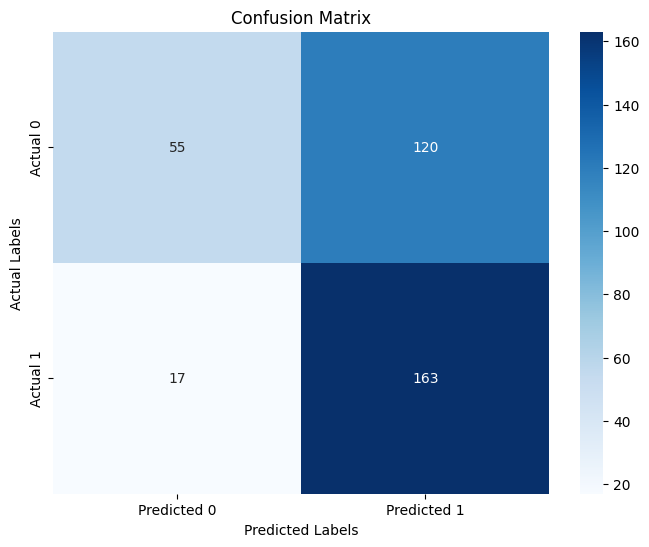

F1 Score: 0.7041036717062635
Recall: 0.9055555555555556
Precision: 0.5759717314487632
Confusion Matrix:
[[ 55 120]
 [ 17 163]]


In [112]:
manual_logreg = joblib.load(os.path.join(data_path,'manual_logreg.pkl'))
logreg = linear_model.LogisticRegression(C=manual_logreg.best_params['logreg_c']).fit(X_train_manual,y_train_manual)
y_pred_logreg = logreg.predict(X_test_manual)

fscore, recall, precision, conf_matrix = report_results(y_test_manual, y_pred_logreg)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")


**TFIDF**

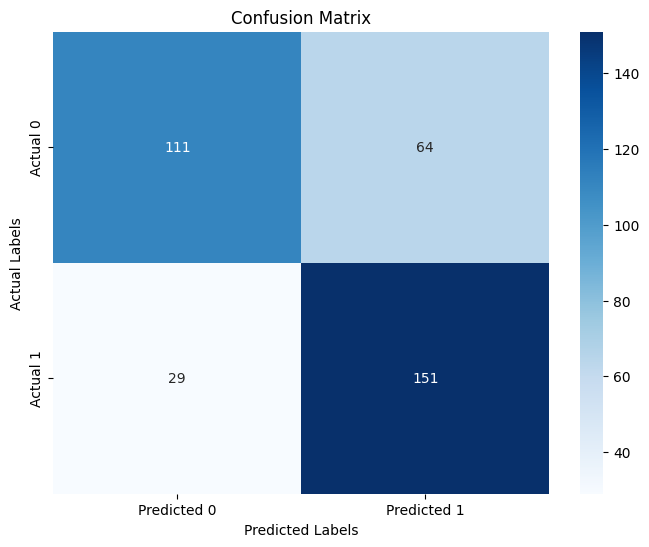

F1 Score: 0.7645569620253164
Recall: 0.8388888888888889
Precision: 0.7023255813953488
Confusion Matrix:
[[111  64]
 [ 29 151]]


In [113]:
tfidf_logreg = joblib.load(os.path.join(data_path,'tfidf_logreg.pkl'))

logreg = linear_model.LogisticRegression(C=tfidf_logreg.best_params['logreg_c']).fit(X_train_tfidf,y_train_tfidf)
y_pred_logreg = logreg.predict(X_test_tfidf)

fscore, recall, precision, conf_matrix = report_results(y_test_tfidf, y_pred_logreg)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**MpNet**

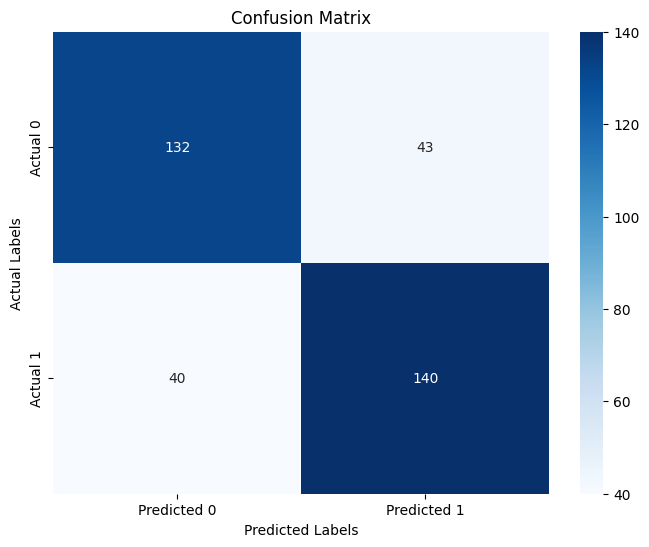

F1 Score: 0.7713498622589532
Recall: 0.7777777777777778
Precision: 0.7650273224043715
Confusion Matrix:
[[132  43]
 [ 40 140]]


In [114]:
mpnet_logreg = joblib.load(os.path.join(data_path,'mpnet_logreg.pkl'))

logreg = linear_model.LogisticRegression(C=mpnet_logreg.best_params['logreg_c']).fit(X_train_mpnet,y_train_mpnet)
y_pred_logreg = logreg.predict(X_test_mpnet)

fscore, recall, precision, conf_matrix = report_results(y_test_mpnet, y_pred_logreg)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**DistilRoberta**

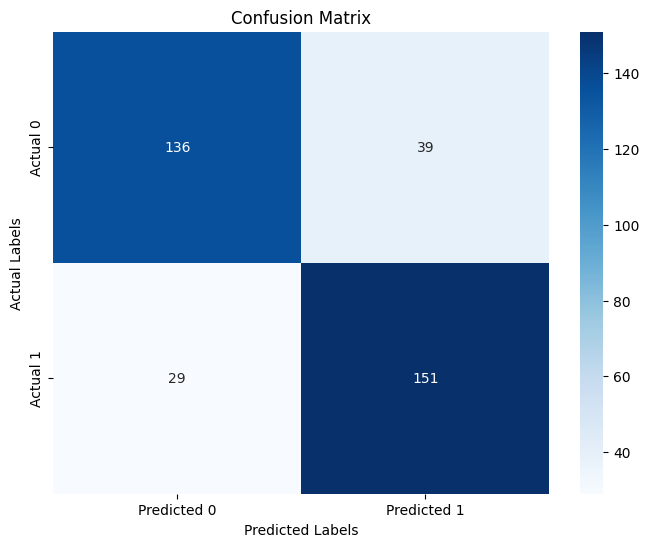

F1 Score: 0.8162162162162162
Recall: 0.8388888888888889
Precision: 0.7947368421052632
Confusion Matrix:
[[136  39]
 [ 29 151]]


In [115]:
distilroberta_logreg = joblib.load(os.path.join(data_path,'distilroberta_logreg.pkl'))

logreg = linear_model.LogisticRegression(C=distilroberta_logreg.best_params['logreg_c']).fit(X_train_distilroberta,y_train_distilroberta)
y_pred_logreg = logreg.predict(X_test_distilroberta)

fscore, recall, precision, conf_matrix = report_results(y_test_distilroberta, y_pred_logreg)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

### SVM

**Manual**

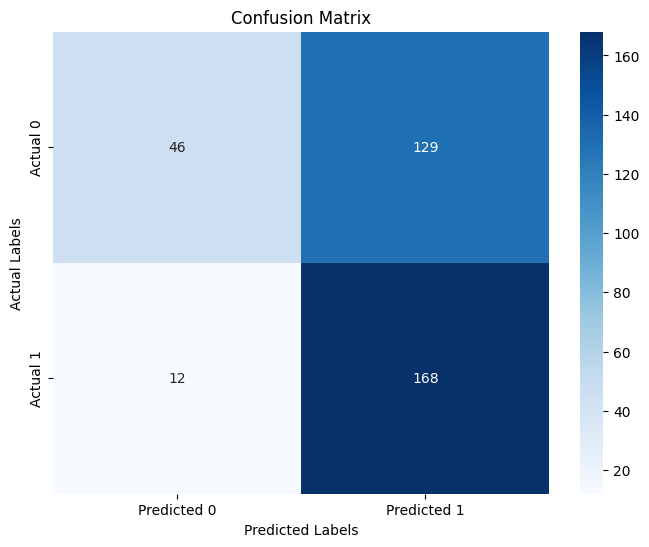

F1 Score: 0.7044025157232704
Recall: 0.9333333333333333
Precision: 0.5656565656565656
Confusion Matrix:
[[ 46 129]
 [ 12 168]]


In [116]:
manual_svm = joblib.load(os.path.join(data_path,'manual_svm.pkl'))
svc = LinearSVC(C=manual_svm.best_params['svm_c'], class_weight=manual_svm.best_params['class_weight']).fit(X_train_manual, y_train_manual)

y_pred_svm = svc.predict(X_test_manual)

fscore, recall, precision, conf_matrix = report_results(y_test_manual, y_pred_svm)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**TFIDF**

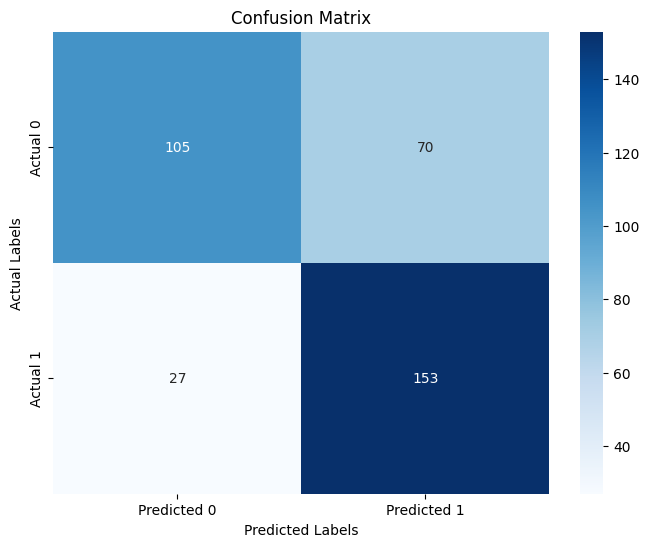

F1 Score: 0.7593052109181141
Recall: 0.85
Precision: 0.6860986547085202
Confusion Matrix:
[[105  70]
 [ 27 153]]


In [117]:
tfidf_svm = joblib.load(os.path.join(data_path,'tfidf_svm.pkl'))
svc = LinearSVC(C=tfidf_svm.best_params['svm_c'], class_weight=tfidf_svm.best_params['class_weight']).fit(X_train_tfidf, y_train_tfidf)

y_pred_svm = svc.predict(X_test_tfidf)

fscore, recall, precision, conf_matrix = report_results(y_test_tfidf, y_pred_svm)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**MPNET**

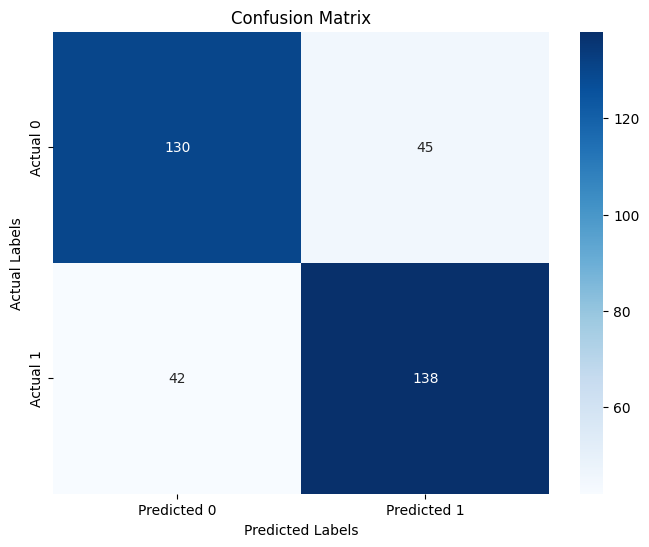

F1 Score: 0.7603305785123967
Recall: 0.7666666666666667
Precision: 0.7540983606557377
Confusion Matrix:
[[130  45]
 [ 42 138]]


In [118]:
mpnet_svm = joblib.load(os.path.join(data_path,'mpnet_svm.pkl'))
svc = LinearSVC(C=mpnet_svm.best_params['svm_c'], class_weight=mpnet_svm.best_params['class_weight']).fit(X_train_mpnet, y_train_mpnet)

y_pred_svm = svc.predict(X_test_mpnet)

fscore, recall, precision, conf_matrix = report_results(y_test_mpnet, y_pred_svm)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**DistilRoBERTa**

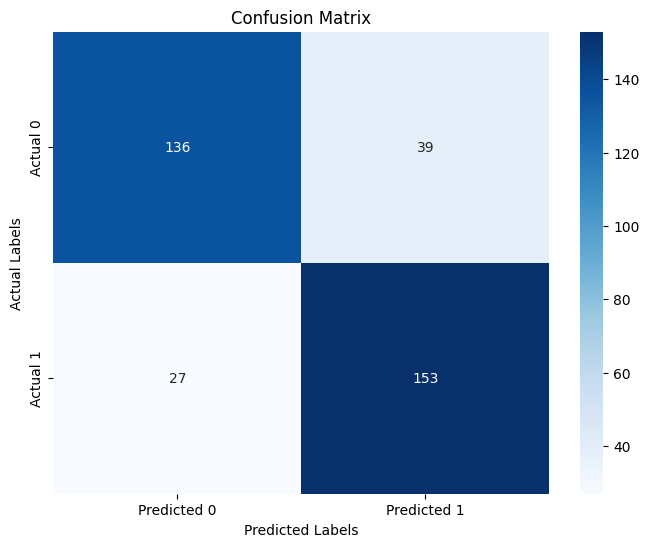

F1 Score: 0.8225806451612904
Recall: 0.85
Precision: 0.796875
Confusion Matrix:
[[136  39]
 [ 27 153]]


In [119]:
distilroberta_svm = joblib.load(os.path.join(data_path,'distilroberta_svm.pkl'))
svc = LinearSVC(C=distilroberta_svm.best_params['svm_c'], class_weight=distilroberta_svm.best_params['class_weight']).fit(X_train_distilroberta, y_train_distilroberta)

y_pred_svm = svc.predict(X_test_distilroberta)

fscore, recall, precision, conf_matrix = report_results(y_test_distilroberta, y_pred_svm)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

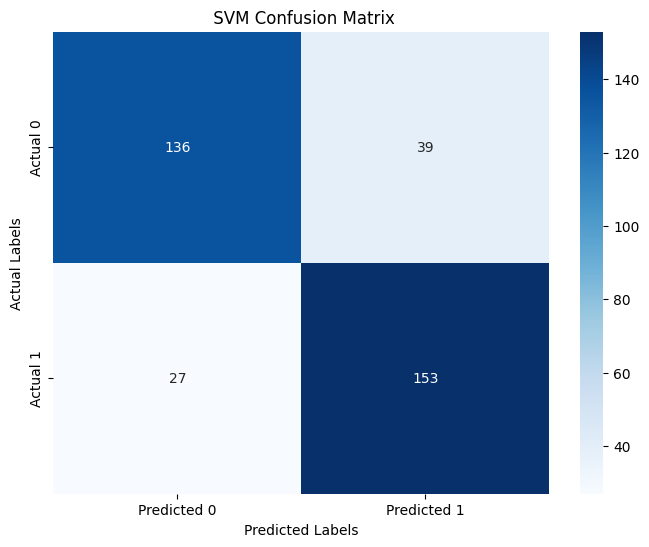

In [121]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title(' SVM Confusion Matrix')
plt.show()

### LigthGBM

**Manual**

[LightGBM] [Info] Number of positive: 1675, number of negative: 1519
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 3194, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524421 -> initscore=0.097761
[LightGBM] [Info] Start training from score 0.097761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

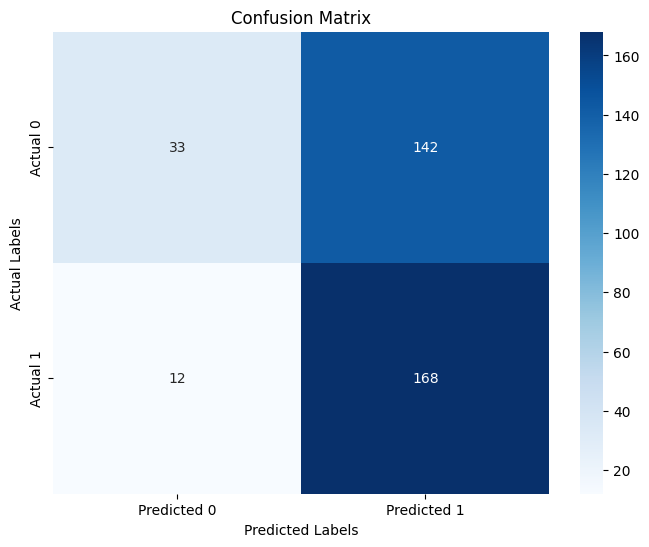

F1 Score: 0.6857142857142857
Recall: 0.9333333333333333
Precision: 0.5419354838709678
Confusion Matrix:
[[ 33 142]
 [ 12 168]]


In [52]:
manual_lgbm = joblib.load(os.path.join(data_path,'manual_lgbm.pkl'))
lgbm = lgb.LGBMClassifier(objective= "binary", num_leaves =manual_lgbm.best_params['num_leaves'],
                                        n_estimators=manual_lgbm.best_params['n_estimators'], learning_rate=manual_lgbm.best_params['lrate']).fit(X_train_manual, y_train_manual)
y_pred_lgbm = lgbm.predict(X_test_manual)
fscore, recall, precision, conf_matrix = report_results(y_test_manual, y_pred_lgbm,)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**TFIDF**

[LightGBM] [Info] Number of positive: 1675, number of negative: 1519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21943
[LightGBM] [Info] Number of data points in the train set: 3194, number of used features: 865
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524421 -> initscore=0.097761
[LightGBM] [Info] Start training from score 0.097761


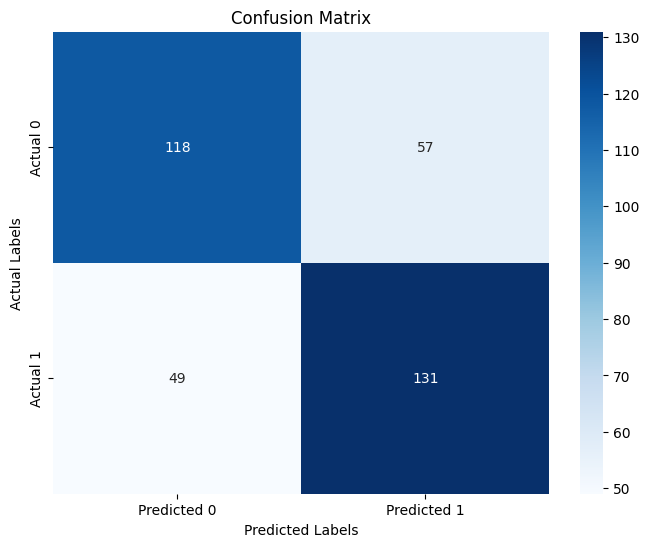

F1 Score: 0.7119565217391305
Recall: 0.7277777777777777
Precision: 0.6968085106382979
Confusion Matrix:
[[118  57]
 [ 49 131]]


In [54]:
tfidf_lgbm = joblib.load(os.path.join(data_path,'tfidf_lgbm.pkl'))
lgbm = lgb.LGBMClassifier(objective= "binary", num_leaves =tfidf_lgbm.best_params['num_leaves'],
                                        n_estimators=tfidf_lgbm.best_params['n_estimators'], learning_rate=tfidf_lgbm.best_params['lrate']).fit(X_train_tfidf, y_train_tfidf)
y_pred_lgbm = lgbm.predict(X_test_tfidf)
fscore, recall, precision, conf_matrix = report_results(y_test_tfidf, y_pred_lgbm,)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**MpNet**

[LightGBM] [Info] Number of positive: 1675, number of negative: 1519
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 3194, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524421 -> initscore=0.097761
[LightGBM] [Info] Start training from score 0.097761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

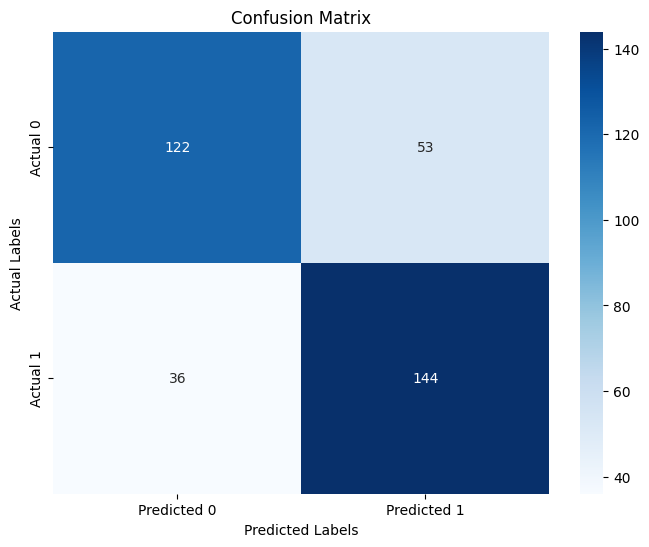

F1 Score: 0.7639257294429708
Recall: 0.8
Precision: 0.7309644670050761
Confusion Matrix:
[[122  53]
 [ 36 144]]


In [55]:
mpnet_lgbm = joblib.load(os.path.join(data_path,'mpnet_lgbm.pkl'))
lgbm = lgb.LGBMClassifier(objective= "binary", num_leaves =mpnet_lgbm.best_params['num_leaves'],
                                        n_estimators=mpnet_lgbm.best_params['n_estimators'], learning_rate=mpnet_lgbm.best_params['lrate']).fit(X_train_mpnet, y_train_mpnet)
y_pred_lgbm = lgbm.predict(X_test_mpnet)
fscore, recall, precision, conf_matrix = report_results(y_test_mpnet, y_pred_lgbm,)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**DistilRoBERTa**

[LightGBM] [Info] Number of positive: 1675, number of negative: 1519
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 3194, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524421 -> initscore=0.097761
[LightGBM] [Info] Start training from score 0.097761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

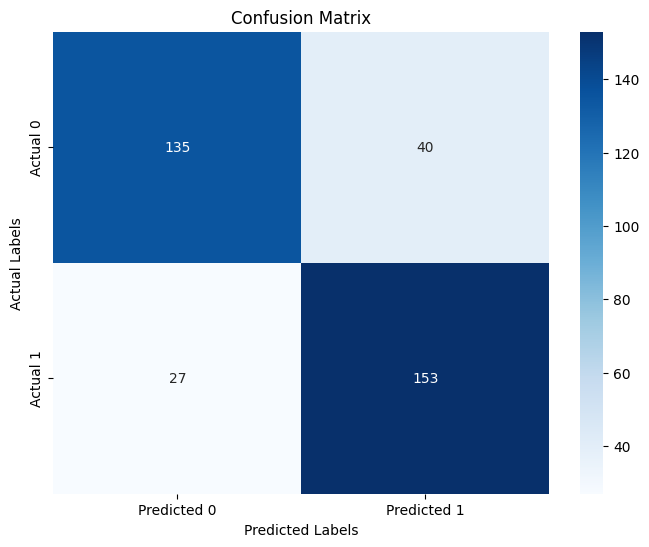

F1 Score: 0.8203753351206434
Recall: 0.85
Precision: 0.7927461139896373
Confusion Matrix:
[[135  40]
 [ 27 153]]


In [56]:
distilroberta_lgbm = joblib.load(os.path.join(data_path,'distilroberta_lgbm.pkl'))
lgbm = lgb.LGBMClassifier(objective= "binary", num_leaves =distilroberta_lgbm.best_params['num_leaves'],
                                        n_estimators=distilroberta_lgbm.best_params['n_estimators'], learning_rate=distilroberta_lgbm.best_params['lrate']).fit(X_train_distilroberta, y_train_distilroberta)
y_pred_lgbm = lgbm.predict(X_test_distilroberta)
fscore, recall, precision, conf_matrix = report_results(y_test_distilroberta, y_pred_lgbm,)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

### Random Forests

**Manual**

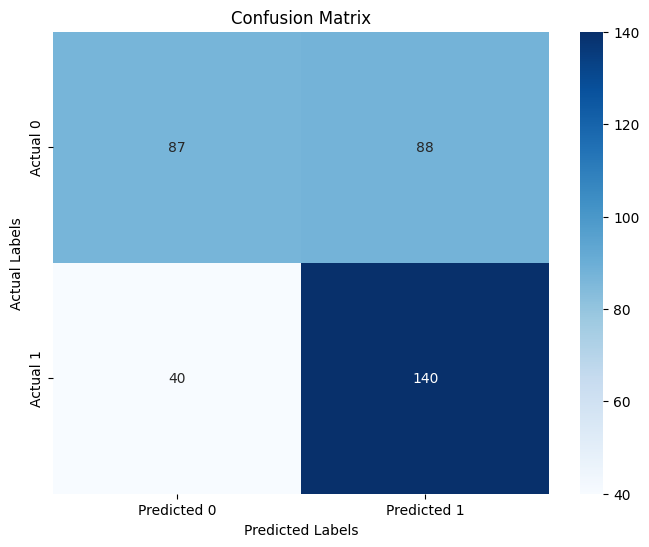

F1 Score: 0.6862745098039216
Recall: 0.7777777777777778
Precision: 0.6140350877192983
Confusion Matrix:
[[ 87  88]
 [ 40 140]]


In [61]:
manual_rf = joblib.load(os.path.join(data_path,'manual_rf.pkl'))
rf = RandomForestClassifier(n_estimators=manual_rf.best_params['rf_n_estimators'], 
                       criterion=manual_rf.best_params['rf_criterion'], 
                       max_depth=manual_rf.best_params['rf_max_depth']).fit(X_train_manual, y_train_manual)
y_pred_rf = rf.predict(X_test_manual)
fscore, recall, precision, conf_matrix = report_results(y_test_manual, y_pred_rf)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**TFIDF**

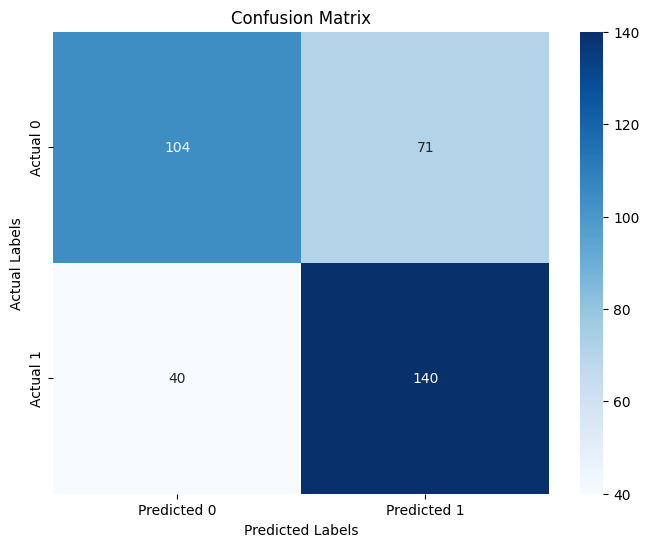

F1 Score: 0.7161125319693095
Recall: 0.7777777777777778
Precision: 0.6635071090047393
Confusion Matrix:
[[104  71]
 [ 40 140]]


In [62]:
tfidf_rf = joblib.load(os.path.join(data_path,'tfidf_rf.pkl'))
rf = RandomForestClassifier(n_estimators=tfidf_rf.best_params['rf_n_estimators'], 
                       criterion=tfidf_rf.best_params['rf_criterion'], 
                       max_depth=tfidf_rf.best_params['rf_max_depth']).fit(X_train_tfidf, y_train_tfidf)
y_pred_rf = rf.predict(X_test_tfidf)
fscore, recall, precision, conf_matrix = report_results(y_test_tfidf, y_pred_rf)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**MpNet**

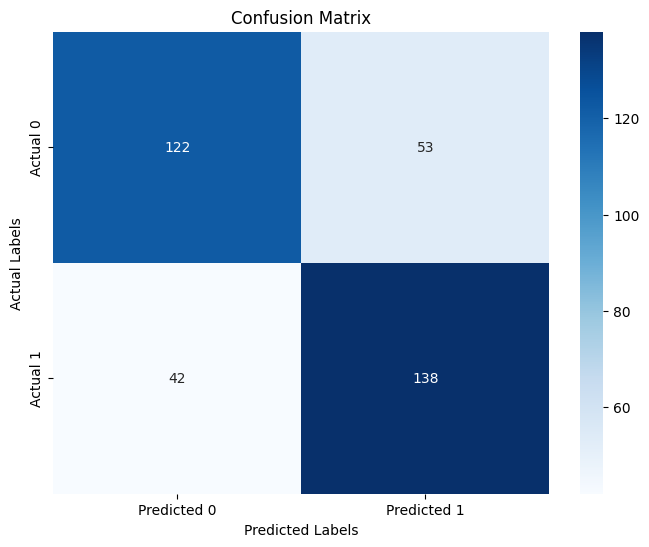

F1 Score: 0.7439353099730458
Recall: 0.7666666666666667
Precision: 0.7225130890052356
Confusion Matrix:
[[122  53]
 [ 42 138]]


In [63]:
mpnet_rf = joblib.load(os.path.join(data_path,'mpnet_rf.pkl'))
rf = RandomForestClassifier(n_estimators=mpnet_rf.best_params['rf_n_estimators'], 
                       criterion=mpnet_rf.best_params['rf_criterion'], 
                       max_depth=mpnet_rf.best_params['rf_max_depth']).fit(X_train_mpnet, y_train_mpnet)
y_pred_rf = rf.predict(X_test_mpnet)
fscore, recall, precision, conf_matrix = report_results(y_test_mpnet, y_pred_rf)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**DistilRoberta**

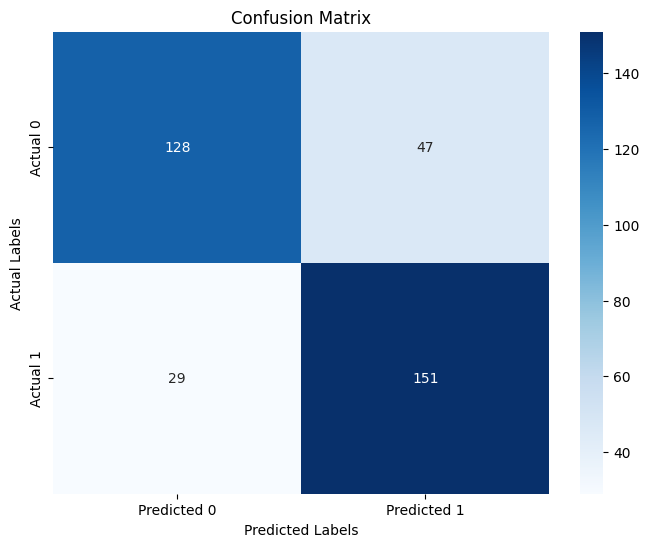

F1 Score: 0.798941798941799
Recall: 0.8388888888888889
Precision: 0.7626262626262627
Confusion Matrix:
[[128  47]
 [ 29 151]]


In [64]:
distilroberta_rf = joblib.load(os.path.join(data_path,'distilroberta_rf.pkl'))
rf = RandomForestClassifier(n_estimators=distilroberta_rf.best_params['rf_n_estimators'], 
                       criterion=distilroberta_rf.best_params['rf_criterion'], 
                       max_depth=distilroberta_rf.best_params['rf_max_depth']).fit(X_train_distilroberta, y_train_distilroberta)
y_pred_rf = rf.predict(X_test_distilroberta)
fscore, recall, precision, conf_matrix = report_results(y_test_distilroberta, y_pred_rf)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

### XGBoost

**Manual**

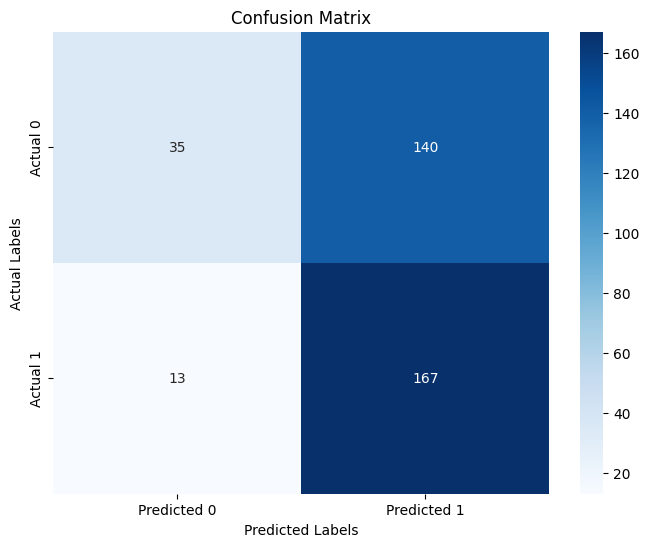

F1 Score: 0.6858316221765913
Recall: 0.9277777777777778
Precision: 0.5439739413680782
Confusion Matrix:
[[ 35 140]
 [ 13 167]]


In [69]:
manual_xgboost = joblib.load(os.path.join(data_path,'manual_xgboost.pkl'))
manual_xgboost.best_params
xgboost = XGBClassifier(n_estimators=manual_xgboost.best_params['n_estimators'], 
              max_depth=manual_xgboost.best_params['max_depth'], 
              learning_rate=manual_xgboost.best_params['learning_rate'], 
              objective='binary:logistic').fit(X_train_manual, y_train_manual)
y_pred_xgboost = xgboost.predict(X_test_manual)
fscore, recall, precision, conf_matrix = report_results(y_test_manual, y_pred_xgboost)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**TFIDF**

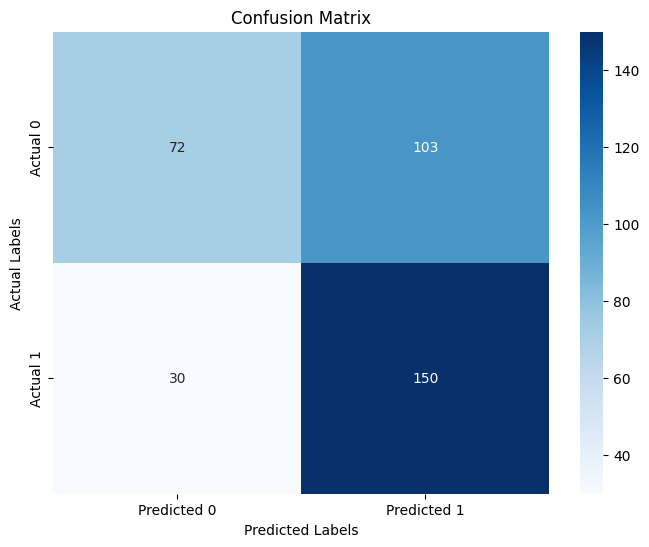

F1 Score: 0.6928406466512702
Recall: 0.8333333333333334
Precision: 0.5928853754940712
Confusion Matrix:
[[ 72 103]
 [ 30 150]]


In [70]:
tfidf_xgboost = joblib.load(os.path.join(data_path,'tfidf_xgboost.pkl'))
tfidf_xgboost.best_params
xgboost = XGBClassifier(n_estimators=tfidf_xgboost.best_params['n_estimators'], 
              max_depth=tfidf_xgboost.best_params['max_depth'], 
              learning_rate=tfidf_xgboost.best_params['learning_rate'], 
              objective='binary:logistic').fit(X_train_tfidf, y_train_tfidf)
y_pred_xgboost = xgboost.predict(X_test_tfidf)
fscore, recall, precision, conf_matrix = report_results(y_test_tfidf, y_pred_xgboost)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**MpNet**

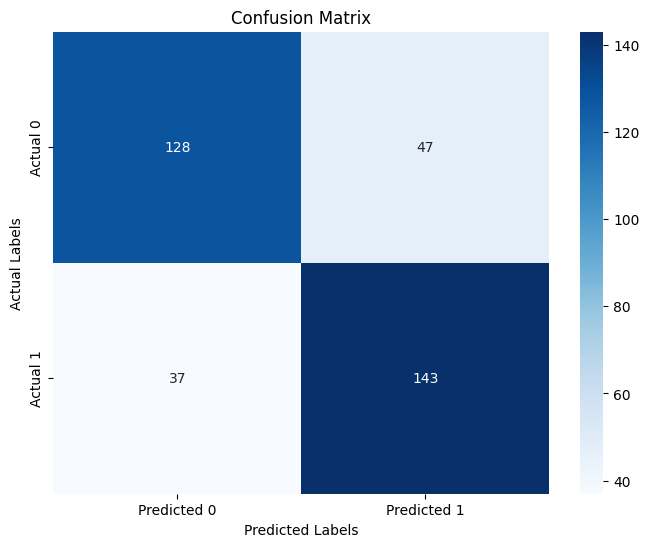

F1 Score: 0.772972972972973
Recall: 0.7944444444444444
Precision: 0.7526315789473684
Confusion Matrix:
[[128  47]
 [ 37 143]]


In [71]:
mpnet_xgboost = joblib.load(os.path.join(data_path,'mpnet_xgboost.pkl'))
mpnet_xgboost.best_params
xgboost = XGBClassifier(n_estimators=mpnet_xgboost.best_params['n_estimators'], 
              max_depth=mpnet_xgboost.best_params['max_depth'], 
              learning_rate=mpnet_xgboost.best_params['learning_rate'], 
              objective='binary:logistic').fit(X_train_mpnet, y_train_mpnet)
y_pred_xgboost = xgboost.predict(X_test_mpnet)
fscore, recall, precision, conf_matrix = report_results(y_test_mpnet, y_pred_xgboost)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**DistilRoBERTa**

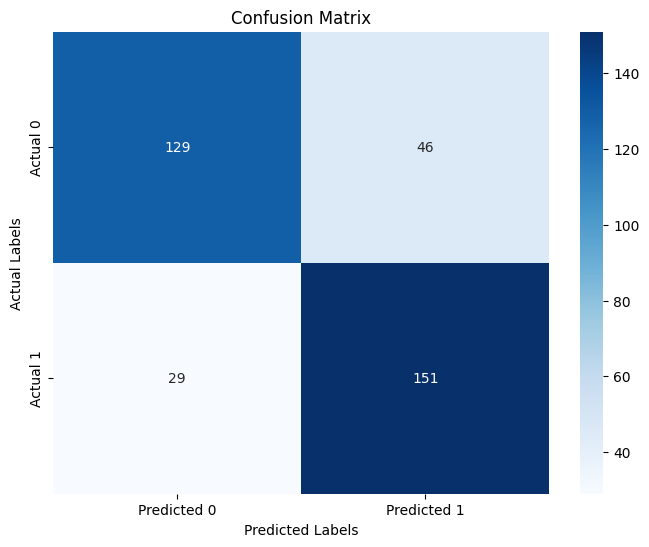

F1 Score: 0.8010610079575596
Recall: 0.8388888888888889
Precision: 0.766497461928934
Confusion Matrix:
[[129  46]
 [ 29 151]]


In [72]:
distilroberta_xgboost = joblib.load(os.path.join(data_path,'distilroberta_xgboost.pkl'))
distilroberta_xgboost.best_params
xgboost = XGBClassifier(n_estimators=distilroberta_xgboost.best_params['n_estimators'], 
              max_depth=distilroberta_xgboost.best_params['max_depth'], 
              learning_rate=distilroberta_xgboost.best_params['learning_rate'], 
              objective='binary:logistic').fit(X_train_distilroberta, y_train_distilroberta)
y_pred_xgboost = xgboost.predict(X_test_distilroberta)
fscore, recall, precision, conf_matrix = report_results(y_test_distilroberta, y_pred_xgboost)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

### Naive Bayes

**Manual**

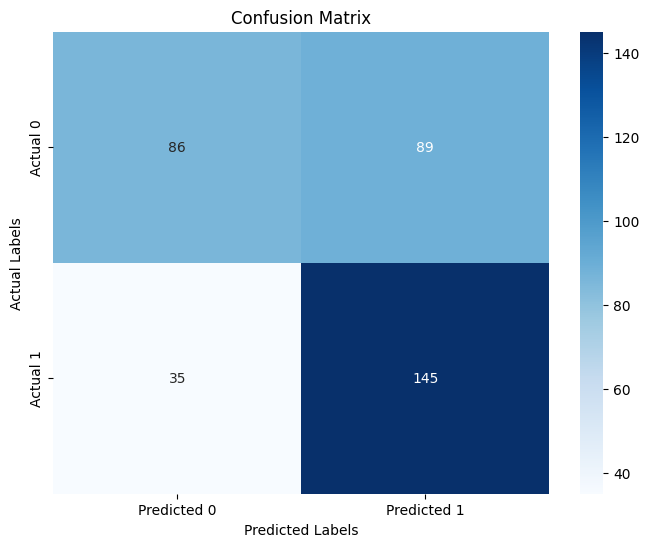

F1 Score: 0.7004830917874396
Recall: 0.8055555555555556
Precision: 0.6196581196581197
Confusion Matrix:
[[ 86  89]
 [ 35 145]]


In [75]:
manual_naivebayes = joblib.load(os.path.join(data_path,'manual_naivebayes.pkl'))
naivebayes = GaussianNB(var_smoothing=manual_naivebayes.best_params["smooth"]).fit(X_train_manual, y_train_manual)
y_pred_naivebayes = naivebayes.predict(X_test_manual)
fscore, recall, precision, conf_matrix = report_results(y_test_manual, y_pred_naivebayes)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**TFIDF**

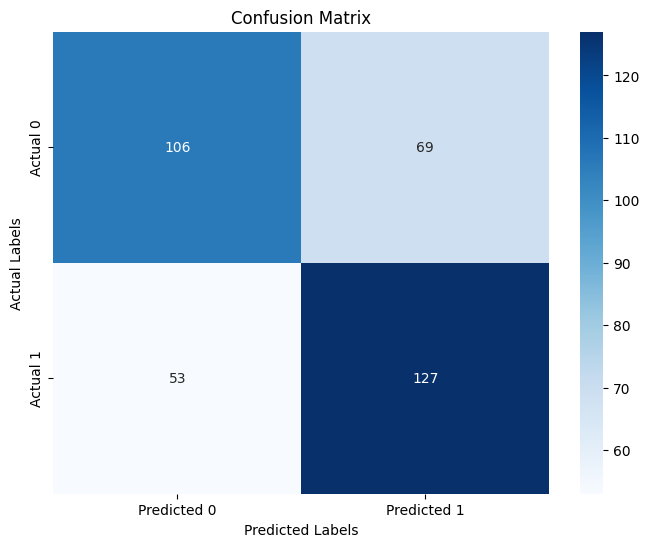

F1 Score: 0.675531914893617
Recall: 0.7055555555555556
Precision: 0.6479591836734694
Confusion Matrix:
[[106  69]
 [ 53 127]]


In [77]:
tfidf_naivebayes = joblib.load(os.path.join(data_path,'tfidf_naivebayes.pkl'))
naivebayes = GaussianNB(var_smoothing=tfidf_naivebayes.best_params["smooth"]).fit(X_train_tfidf, y_train_tfidf)
y_pred_naivebayes = naivebayes.predict(X_test_tfidf)
fscore, recall, precision, conf_matrix = report_results(y_test_tfidf, y_pred_naivebayes)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**MpNet**

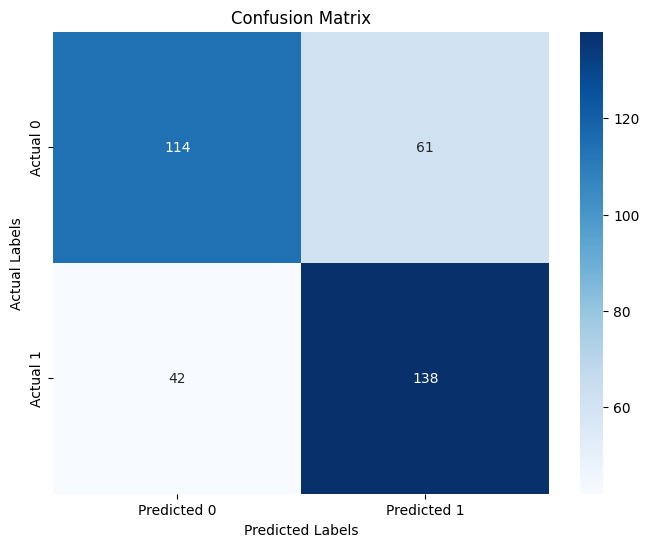

F1 Score: 0.7282321899736148
Recall: 0.7666666666666667
Precision: 0.6934673366834171
Confusion Matrix:
[[114  61]
 [ 42 138]]


In [78]:
mpnet_naivebayes = joblib.load(os.path.join(data_path,'mpnet_naivebayes.pkl'))
naivebayes = GaussianNB(var_smoothing=mpnet_naivebayes.best_params["smooth"]).fit(X_train_mpnet, y_train_mpnet)
y_pred_naivebayes = naivebayes.predict(X_test_mpnet)
fscore, recall, precision, conf_matrix = report_results(y_test_mpnet, y_pred_naivebayes)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**DistilRoBERTa**

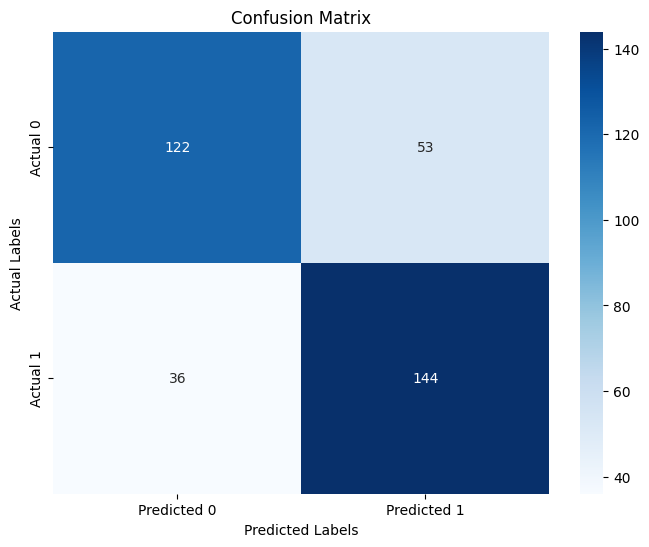

F1 Score: 0.7639257294429708
Recall: 0.8
Precision: 0.7309644670050761
Confusion Matrix:
[[122  53]
 [ 36 144]]


In [79]:
distilroberta_naivebayes = joblib.load(os.path.join(data_path,'distilroberta_naivebayes.pkl'))
naivebayes = GaussianNB(var_smoothing=distilroberta_naivebayes.best_params["smooth"]).fit(X_train_distilroberta, y_train_distilroberta)
y_pred_naivebayes = naivebayes.predict(X_test_distilroberta)
fscore, recall, precision, conf_matrix = report_results(y_test_distilroberta, y_pred_naivebayes)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

### KNN

**Manual**

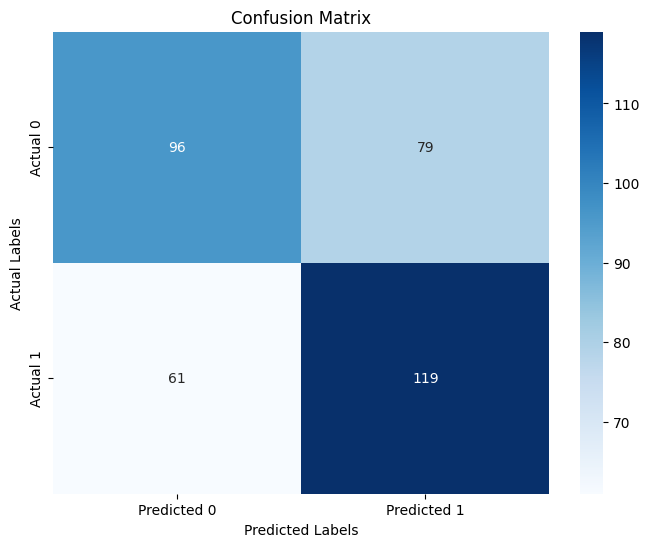

F1 Score: 0.6296296296296297
Recall: 0.6611111111111111
Precision: 0.601010101010101
Confusion Matrix:
[[ 96  79]
 [ 61 119]]


In [83]:
manual_knn = joblib.load(os.path.join(data_path,'manual_knn.pkl'))

knn = KNeighborsClassifier(n_neighbors=manual_knn.best_params['neighbors'], 
                     weights=manual_knn.best_params['knn_weights'], 
                     leaf_size=manual_knn.best_params['knn_leaf_size'], 
                     n_jobs=-1).fit(X_train_manual, y_train_manual)
y_pred_knn = knn.predict(X_test_manual)
fscore, recall, precision, conf_matrix = report_results(y_test_manual, y_pred_knn)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**TFIDF**

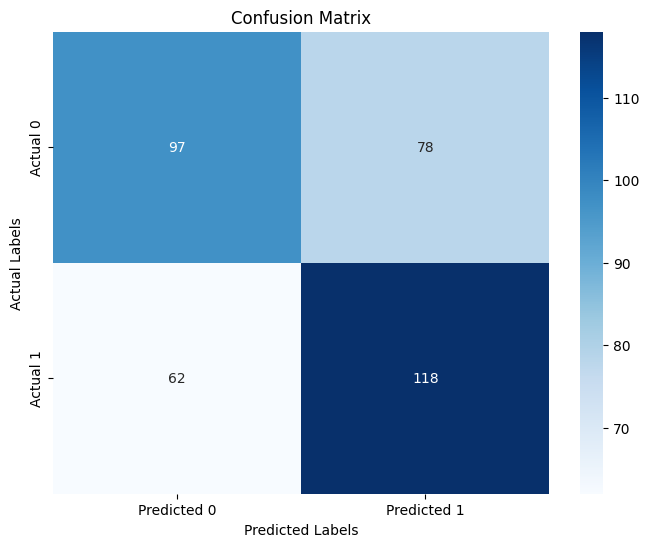

F1 Score: 0.6276595744680851
Recall: 0.6555555555555556
Precision: 0.6020408163265306
Confusion Matrix:
[[ 97  78]
 [ 62 118]]


In [84]:
tfidf_knn = joblib.load(os.path.join(data_path,'tfidf_knn.pkl'))

knn = KNeighborsClassifier(n_neighbors=tfidf_knn.best_params['neighbors'], 
                     weights=tfidf_knn.best_params['knn_weights'], 
                     leaf_size=tfidf_knn.best_params['knn_leaf_size'], 
                     n_jobs=-1).fit(X_train_tfidf, y_train_tfidf)
y_pred_knn = knn.predict(X_test_tfidf)
fscore, recall, precision, conf_matrix = report_results(y_test_tfidf, y_pred_knn)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**MpNet**

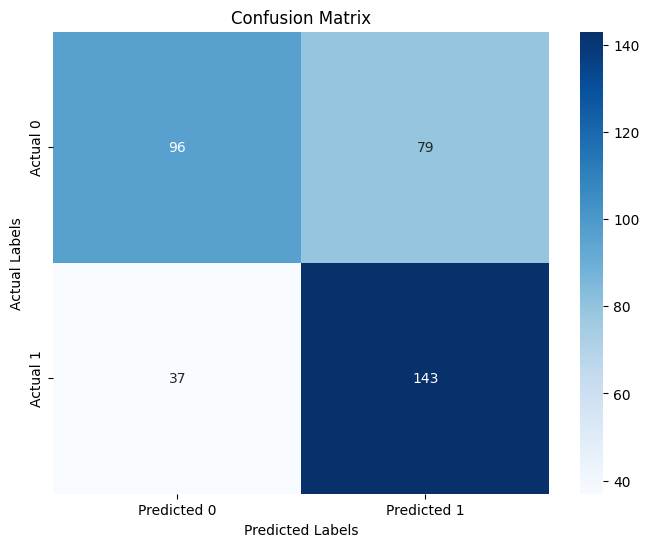

F1 Score: 0.7114427860696517
Recall: 0.7944444444444444
Precision: 0.6441441441441441
Confusion Matrix:
[[ 96  79]
 [ 37 143]]


In [85]:
mpnet_knn = joblib.load(os.path.join(data_path,'mpnet_knn.pkl'))

knn = KNeighborsClassifier(n_neighbors=mpnet_knn.best_params['neighbors'], 
                     weights=mpnet_knn.best_params['knn_weights'], 
                     leaf_size=mpnet_knn.best_params['knn_leaf_size'], 
                     n_jobs=-1).fit(X_train_mpnet, y_train_mpnet)
y_pred_knn = knn.predict(X_test_mpnet)
fscore, recall, precision, conf_matrix = report_results(y_test_mpnet, y_pred_knn)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

**DistilRoBERTa**

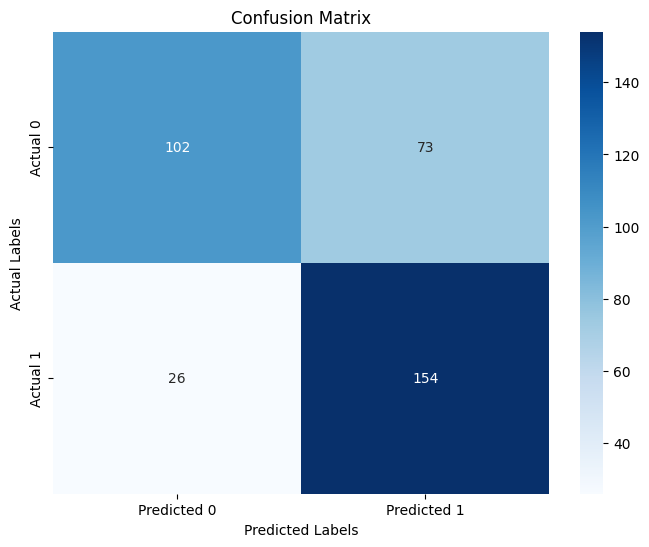

F1 Score: 0.7567567567567568
Recall: 0.8555555555555555
Precision: 0.6784140969162996
Confusion Matrix:
[[102  73]
 [ 26 154]]


In [87]:
distilroberta_knn = joblib.load(os.path.join(data_path,'distilroberta_knn.pkl'))

knn = KNeighborsClassifier(n_neighbors=distilroberta_knn.best_params['neighbors'], 
                     weights=distilroberta_knn.best_params['knn_weights'], 
                     leaf_size=distilroberta_knn.best_params['knn_leaf_size'], 
                     n_jobs=-1).fit(X_train_distilroberta, y_train_distilroberta)
y_pred_knn = knn.predict(X_test_distilroberta)
fscore, recall, precision, conf_matrix = report_results(y_test_distilroberta, y_pred_knn)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

### RoBERTa

In [97]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from torch.optim import AdamW
from transformers import RobertaForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import RobertaForSequenceClassification, RobertaConfig
import utils
from torch.utils.data import Subset, DataLoader
import numpy as np

In [98]:
#Se leen los datos y se seleccionan las variables que presentan una diferencia
# entre los individuos que presentan estres y los que no
data_path = Path(os.getcwd()).parent / "data"
df_train = pd.read_csv(data_path / "silver" / "dreadditCleanTrain.csv", usecols= ["text","clean_text","label"])
df_test = pd.read_csv(data_path / "silver" / "dreadditCleanTest.csv", usecols= ["text","clean_text","label"])

In [99]:
# Load the configuration for the model
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
config = RobertaConfig.from_pretrained(model_name, num_labels=2)  # Set to 2 for binary classification
model = RobertaForSequenceClassification.from_pretrained(model_name, config=config, ignore_mismatched_sizes=True)
tokenizer = RobertaTokenizer.from_pretrained(model_name)

config.id2label = {0: "no estres", 1: "estres"}
config.label2id = {"no estres": 0, "estres": 1}

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

c:\Users\franc.FJMOYAO\miniconda3\envs\tesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceC

In [100]:
# Ejemplo de cómo usar el dataset
dataset = SentimentDataset(df_train['text'].tolist(), df_train['label'].tolist(), tokenizer, max_length=128)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Suponiendo que 'model' y 'loader' están definidos y configurados correctamente
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = AdamW(model.parameters(), lr=1e-5)

# Listas para almacenar las métricas
losses = []
f1_scores = []

# Convertir labels a numpy para el uso con StratifiedKFold
labels = np.array(df_train['label'].tolist())

num_epochs =5

In [102]:
train_loader =DataLoader(dataset, batch_size=16, shuffle=True)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}')

Epoch 1/9, Train Loss: 0.3008
Epoch 2/9, Train Loss: 0.2140
Epoch 3/9, Train Loss: 0.1279
Epoch 4/9, Train Loss: 0.0845
Epoch 5/9, Train Loss: 0.0646
Epoch 6/9, Train Loss: 0.0339
Epoch 7/9, Train Loss: 0.0380
Epoch 8/9, Train Loss: 0.0320
Epoch 9/9, Train Loss: 0.0242


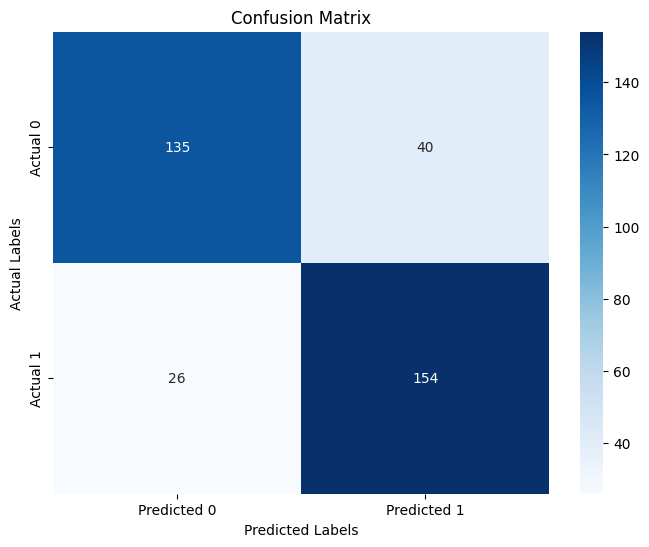

F1 Score: 0.8235294117647058
Recall: 0.8555555555555555
Precision: 0.7938144329896907
Confusion Matrix:
[[135  40]
 [ 26 154]]


In [106]:
#Evaluacion 

res= df_test.text.apply(utils.make_prediction,args=(model,tokenizer, device))
y = df_test.label 
y_pred =res.apply(lambda x: x[1])

fscore, recall, precision, conf_matrix = report_results(y, y_pred)

print(f"F1 Score: {fscore}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

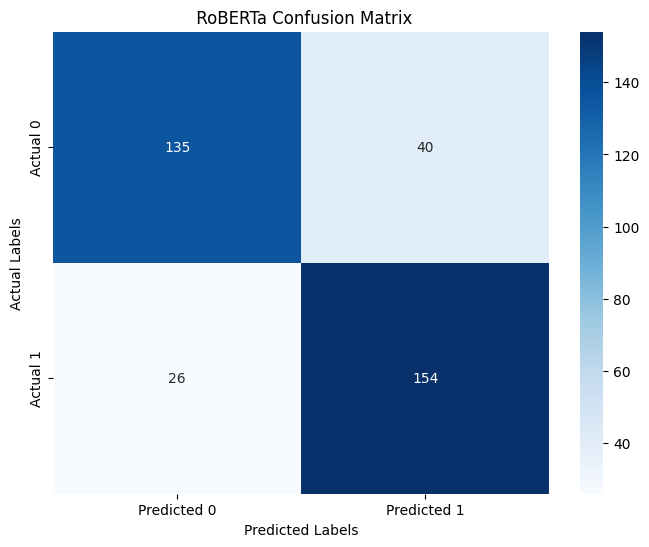

In [107]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title(' RoBERTa Confusion Matrix')
plt.show()